In [1]:
import numpy as np
import pandas as pd
import sys
import sqlite3

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('plotting.mplstyle')

In [2]:
sys.path.insert(0, '/home/nsryan/Desktop/arfc/transition-scenarios/scripts')
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]

In [3]:
import cymetric as cym
from cymetric import graphs
import transition_metrics as tm
import dataframe_analysis as dta
import analysis as an
import collections


In [4]:
import nuclides
import fuel_transactions as tran

In [5]:
ad_reactors = {'AP1000':[1117, 0.925, 80, 'no_dist'],'Xe100': [80, 1, 60, 'no_dist'], 'MMR': [5, 1, 20, 'no_dist']}

# Scope
The scope of this notebook includes the historically deployed LWRs in the United States.

In [162]:
# current_outfile = '../output/existing_lwr_only_out.sqlite'
# current_outfile = 'test_tran_out6.sqlite'
# current_outfile = 'output/dan1_out.sqlite'
# current_outfile = 'test_tran_out6.sqlite'
# current_outfile = '../../../../../../../media/nsryan/Elements/scenes/single_reactor/multi_fuel/output/da15l2_out.sqlite'

file = 'da3d1'

current_outfile = f'../../../../../../../media/nsryan/Elements/scenes/single_reactor/one_fuel/output/{file}_out.sqlite'
out_base = '../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/single_one/'


## Reactor Deployment

In [7]:
currents = ['Sinks', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment', 'LWReactors', 'XE']

In [22]:
currents = ['Sinks', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment', 'LWReactors', 'USNC']

In [36]:
currents = ['Sinks', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment', 'LWReactors', 'USNC', 'XE', 'AP']

In [8]:
lwr_list = [
    'Arkansas_Nuclear_One_1','Arkansas_Nuclear_One_2','Beaver_Valley_1','Beaver_Valley_2','Big_Rock_Point','Braidwood_1','Braidwood_2',
    'Browns_Ferry_1','Browns_Ferry_2','Browns_Ferry_3','Brunswick_1',
    'Brunswick_2','Byron_1','Byron_2','Callaway',
    'Calvert_Cliffs_1','Calvert_Cliffs_2','Catawba_1','Catawba_2',
    'Clinton_1','Columbia','Comanche_Peak_1','Comanche_Peak_2',
    'Cook_1','Cook_2','Cooper_Station','Crystal_River_3',
    'Davis_Besse','Diablo_Canyon_1','Diablo_Canyon_2',
    'Dresden_1','Dresden_2','Dresden_3','Duane_Arnold',
    'Enrico_Fermi_2','Farley_1','Farley_2',
    'Fitzpatrick','Fort_Calhoun','Ginna',
    'Grand_Gulf_1','Haddam_Neck','Harris_1',
    'Hatch_1','Hatch_2','Hope_Creek',
    'Humboldt_Bay','Indian_Point_1','Indian_Point_2',
    'Indian_Point_3','Kewaunee','La_Crosse',
    'LaSalle_County_1','LaSalle_County_2','Limerick_1',
    'Limerick_2','Maine_Yankee','McGuire_1',
    'McGuire_2','Millstone_1','Millstone_2',
    'Millstone_3','Monticello','Nine_Mile_Point_1',
    'Nine_Mile_Point_2','North_Anna_1','North_Anna_2',
    'Oconee_1','Oconee_2','Oconee_3',
    'Oyster_Creek','Palisades','Palo_Verde_1','Palo_Verde_2',
    'Palo_Verde_3','Peach_Bottom_2','Peach_Bottom_3','Perry_1',
    'Pilgrim_1','Point_Beach_1','Point_Beach_2','Prairie_Island_1',
    'Prairie_Island_2','Quad_Cities_1','Quad_Cities_2','Rancho_Seco',
    'River_Bend_1','Robinson_2','Salem_1','Salem_2','San_Onofre_1',
    'San_Onofre_2','San_Onofre_3','Seabrook','Sequoyah_1',
    'Sequoyah_2','Shoreham','South_Texas_1','South_Texas_2',
    'St_Lucie_1','St_Lucie_2','Summer_1','Surry_1','Surry_2',
    'Susquehanna_1','Susquehanna_2','Three_Mile_Island_1','Three_Mile_Island_2',
    'Trojan','Turkey_Point_3','Turkey_Point_4','Vermont_Yankee','Vogtle_1',
    'Vogtle_2','Vogtle_3','Vogtle_4','Waterford_3','Watts_Bar_1','Watts_Bar_2',
    'Wolf_Creek_1','Yankee_Rowe','Zion_1','Zion_2'
]

In [9]:
current_reactors = tm.get_lwr_totals(current_outfile, currents)
current_reactors = dta.add_year(current_reactors, y0=1958)

In [164]:
current_reactors

Prototype,index,Time,0,Arkansas_Nuclear_One_1_enter,Arkansas_Nuclear_One_2_enter,Beaver_Valley_1_enter,Beaver_Valley_2_enter,Big_Rock_Point_enter,Braidwood_1_enter,Braidwood_2_enter,...,Sinks_exit,Sink_HLW_exit,Sink_LLW_exit,Mine_exit,Enrichment_exit,LWReactors_exit,XE_exit,lwr_exit,lwr_total,Year
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1958.00
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1958.08
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1958.17
3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1958.25
4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1958.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1747,1747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65200.0,2103.58
1748,1748,1748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65200.0,2103.67
1749,1749,1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65200.0,2103.75
1750,1750,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65200.0,2103.83


In [165]:
current_reactors.columns.to_list()

['index',
 'Time',
 0,
 'Arkansas_Nuclear_One_1_enter',
 'Arkansas_Nuclear_One_2_enter',
 'Beaver_Valley_1_enter',
 'Beaver_Valley_2_enter',
 'Big_Rock_Point_enter',
 'Braidwood_1_enter',
 'Braidwood_2_enter',
 'Browns_Ferry_1_enter',
 'Browns_Ferry_2_enter',
 'Browns_Ferry_3_enter',
 'Brunswick_1_enter',
 'Brunswick_2_enter',
 'Byron_1_enter',
 'Byron_2_enter',
 'Callaway_enter',
 'Calvert_Cliffs_1_enter',
 'Calvert_Cliffs_2_enter',
 'Catawba_1_enter',
 'Catawba_2_enter',
 'Clinton_1_enter',
 'Columbia_enter',
 'Comanche_Peak_1_enter',
 'Comanche_Peak_2_enter',
 'Cook_1_enter',
 'Cook_2_enter',
 'Cooper_Station_enter',
 'Crystal_River_3_enter',
 'Davis_Besse_enter',
 'Diablo_Canyon_1_enter',
 'Diablo_Canyon_2_enter',
 'Dresden_1_enter',
 'Dresden_2_enter',
 'Dresden_3_enter',
 'Duane_Arnold_enter',
 'Enrichment_enter',
 'Enrichment_xe_haleu',
 'Enrico_Fermi_2_enter',
 'Farley_1_enter',
 'Farley_2_enter',
 'Fitzpatrick_enter',
 'Fort_Calhoun_enter',
 'FuelCycle',
 'Ginna_enter',
 'Gran

In [166]:
total_lwr = np.zeros(len(current_reactors))
for reactor in lwr_list:
    for time in range(len(current_reactors)):
        if reactor == 'Vogtle_4':
            total_lwr[time] += current_reactors[reactor][time]
        else:
            total_lwr[time] += current_reactors[reactor + '_enter'][time]
            total_lwr[time] += current_reactors[reactor + '_exit'][time]

In [ ]:
total_mmr_reactors = np.array(current_reactors['MMR'].to_list())

In [137]:
total_xe_reactors = np.array(current_reactors['Xe100'].to_list())

KeyError: 'Xe100'

In [ ]:
total_ap_reactors = np.array(current_reactors['AP1000'].to_list())

In [157]:
# create a dataframe out of the total_xeh and total_xel arrays
total_xe = pd.DataFrame({'Year': current_reactors['Year'],'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),'Xe100': total_xe_reactors, 'Total_Xe100': total_xe_reactors.cumsum()})

In [ ]:
total_mmrl = np.zeros(len(current_reactors))
if 'MMRl_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_mmrl[time] += current_reactors['MMRl_enter'][time]
        total_mmrl[time] += current_reactors['MMRl_exit'][time]
elif 'MMRl' in current_reactors.columns:
    total_mmrl = np.array(current_reactors['MMRl'].to_list())
else:
    pass

total_mmrh = np.zeros(len(current_reactors))
if 'MMRh_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_mmrh[time] += current_reactors['MMRh_enter'][time]
        total_mmrh[time] += current_reactors['MMRh_exit'][time]
elif 'MMRh' in current_reactors.columns:
    total_mmrh = np.array(current_reactors['MMRh'].to_list())
else:
    pass

total_ap = np.zeros(len(current_reactors))
if 'AP1000_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_ap[time] += current_reactors['AP1000_enter'][time]
        total_ap[time] += current_reactors['AP1000_exit'][time]
elif 'AP1000' in current_reactors.columns:
    total_ap = np.array(current_reactors['AP1000'].to_list())
else:
    pass

In [167]:
total_xel = np.zeros(len(current_reactors))
if 'Xe100l_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_xel[time] += current_reactors['Xe100l_enter'][time]
        total_xel[time] += current_reactors['Xe100l_exit'][time]
elif 'Xe100l' in current_reactors.columns:
    total_xel = np.array(current_reactors['Xe100l'].to_list())
else:
    pass

total_xeh = np.zeros(len(current_reactors))
if 'Xe100h_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_xeh[time] += current_reactors['Xe100h_enter'][time]
        total_xeh[time] += current_reactors['Xe100h_exit'][time]
elif 'Xe100h' in current_reactors.columns:
    total_xeh = np.array(current_reactors['Xe100h'].to_list())
elif 'Xe100_enter' in current_reactors.columns:
    for time in range(len(current_reactors)):
        total_xeh[time] += current_reactors['Xe100_enter'][time]
        total_xeh[time] += current_reactors['Xe100_exit'][time]
else:
    pass

In [168]:
total_xe = pd.DataFrame({'Year': current_reactors['Year'],'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),'Xe100h': total_xeh, 'Total_Xe100h': total_xeh.cumsum()})

In [116]:
# create a dataframe out of the total_xeh and total_xel arrays
total_xe = pd.DataFrame({'Year': current_reactors['Year'],'LWRs': total_lwr, 'Total LWRs': total_lwr.cumsum(),'Xe100h': total_xeh, 'Total_Xe100h': total_xeh.cumsum(), 'Xe100l': total_xel, 'Total_Xe100l': total_xel.cumsum()})

In [169]:
save = f'reactors/{file}_reactors'
total_xe.to_csv(out_base + save + '.csv', index=False)

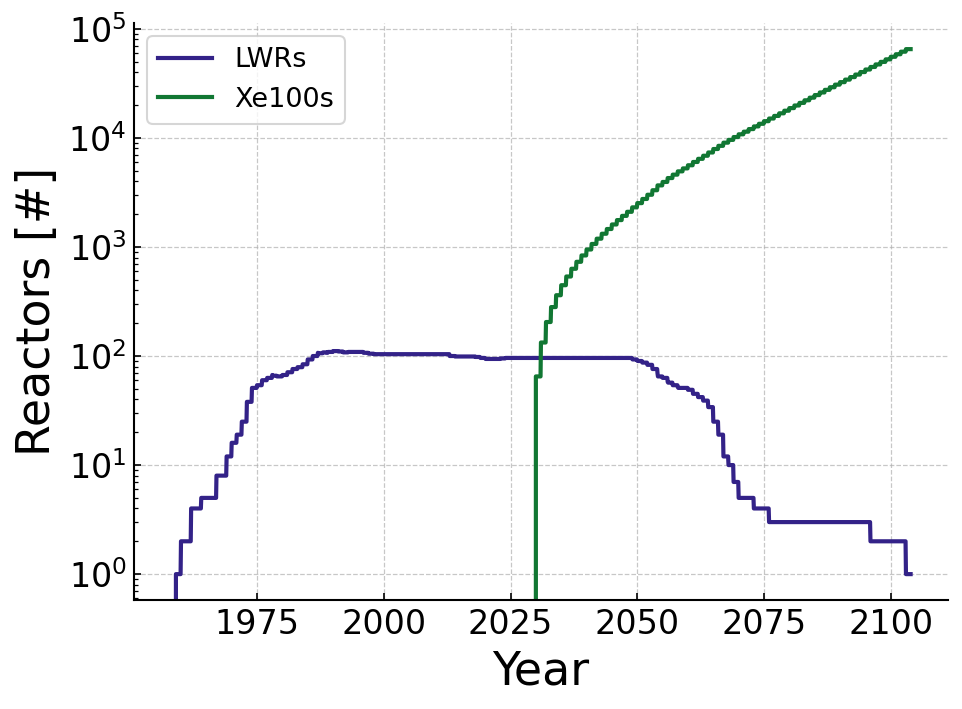

In [170]:
plt.plot(current_reactors['Year'], total_lwr.cumsum(), label='LWRs')

if 'MMRh_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_mmrh.cumsum(), label='HALEU MMRs')
if 'MMRl_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_mmrl.cumsum(), label='LEU+ MMRs LEU')
if 'MMR' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_mmr_reactors.cumsum(), label='MMRs')

if 'Xe100h_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xeh.cumsum(), label='HALEU Xe100s')
if 'Xe100l_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xel.cumsum(), label='LEU+ Xe100s')
if 'Xe100_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xeh.cumsum(), label='Xe100s')
if 'Xe100' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_xe_reactors.cumsum(), label='Xe100s')

if 'AP1000_enter' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_ap.cumsum(), label='AP1000s')
if 'AP1000' in current_reactors.columns:
    plt.plot(current_reactors['Year'], total_ap_reactors.cumsum(), label='AP1000s')

#plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Reactors [#]')
plt.yscale('log')
plt.legend()

plt.savefig(out_base + save + '.pdf')

## Energy Output

In [10]:
file = 'da3d1'

current_outfile = f'../../../../../../../media/nsryan/Elements/scenes/single_reactor/one_fuel/output/{file}_out.sqlite'
out_base = '../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/single_one/'

current_reactors = tm.get_lwr_totals(current_outfile, currents)
current_reactors = dta.add_year(current_reactors, y0=1958)

In [11]:
current_energy = tm.get_annual_electricity(current_outfile)

In [12]:
energy_xe = np.zeros(len(current_reactors))

for time in range(len(current_reactors)):
    if time + ad_reactors['Xe100'][2]*12 < len(current_reactors):
        energy_xe[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100_enter'][time] * ad_reactors['Xe100'][0]/1000
    else:
        energy_xe[time:] += current_reactors['Xe100_enter'][time] * ad_reactors['Xe100'][0]/1000

# convert the monthly energy to annual energy
energy_xe_ye = energy_xe[::12]
energy_xe_ye = energy_xe_ye[1:]

In [13]:
total_xe = pd.DataFrame({'Year': current_energy['Year'], 'System Energy (GWe-y)': current_energy['Energy'], 'Xe100 (GWe-y)': energy_xe_ye, 'Total Xe100 (GWe-y)': energy_xe_ye.cumsum()})

In [ ]:
# energy_mmrl = np.zeros(len(total_mmrl))

# for time in range(len(total_mmrl)):
#     if time + ad_reactors['MMR'][2] < len(total_mmrl):
#         energy_mmrl[time: time + ad_reactors['MMR'][2]*12] += current_reactors['MMRl_enter'][time] * ad_reactors['MMR'][0]
#     else:
#         energy_mmrl[time:] += current_reactors['MMRl_enter'][time] * ad_reactors['MMR'][0]

# energy_mmrh = np.zeros(len(total_xeh))

# for time in range(len(total_xeh)):
#     if time + ad_reactors['MMR'][2] < len(total_xeh):
#         energy_mmrh[time: time + ad_reactors['MMR'][2]*12] += current_reactors['MMRh_enter'][time] * ad_reactors['MMR'][0]
#     else:
#         energy_mmrh[time:] += current_reactors['MMRh_enter'][time] * ad_reactors['MMR'][0]

# energy_mmrl = total_mmrl * ad_reactors['MMR'][0]
# energy_mmrh = total_mmrh * ad_reactors['MMR'][0]
# energy_mmr_total = energy_mmrl + energy_mmrh

In [15]:
energy_xeh = np.zeros(len(total_xeh))

for time in range(len(total_xeh)):
    if time + ad_reactors['Xe100'][2] < len(total_xeh):
        energy_xeh[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100h_enter'][time] * ad_reactors['Xe100'][0]/1000
    else:
        energy_xeh[time:] += current_reactors['Xe100h_enter'][time] * ad_reactors['Xe100'][0]/1000

energy_xel = np.zeros(len(total_xel))

for time in range(len(total_xel)):
    if time + ad_reactors['Xe100'][2] < len(total_xel):
        energy_xel[time: time + ad_reactors['Xe100'][2]*12] += current_reactors['Xe100l_enter'][time] * ad_reactors['Xe100'][0]/1000
    else:
        energy_xel[time:] += current_reactors['Xe100l_enter'][time] * ad_reactors['Xe100'][0]/1000

energy_xe_total = energy_xel + energy_xeh

KeyError: 'Xe100h_enter'

In [ ]:
total_xe = pd.DataFrame({'Months': current_reactors['Year'], 'Year': current_energy['Year'], 'System Energy (GWe-y)': current_energy['Energy'], 'Xe100h (GWe-y)': energy_xeh, 'Xe100l (GWe-y)': energy_xel})

In [14]:
save = f'energy/{file}_energy'
total_xe.to_csv(out_base + save + '.csv', index=False)

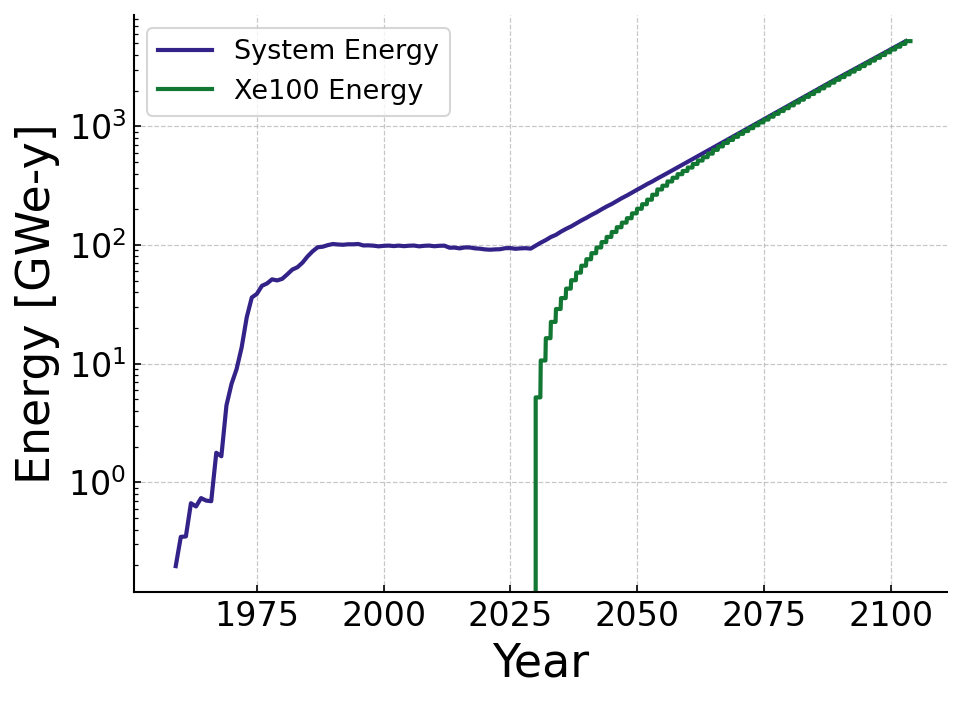

In [15]:
# Plot the yearly energy
plt.plot(current_energy['Year'], current_energy['Energy'], label='System Energy')

plt.plot(current_reactors['Year'], energy_xe, label='Xe100 Energy')

# plt.plot(current_reactors['Year'], energy_xel, label='LEU+ Xe100s')
# plt.plot(current_reactors['Year'], energy_xeh, label='HALEU Xe100s')
# plt.plot(current_reactors['Year'], energy_xe_total, label='Xe100 Total')

# plt.plot(current_reactors['Year'], energy_mmrl.cumsum(), label='LEU+ MMRs')
# plt.plot(current_reactors['Year'], energy_mmrh, label='HALEU MMRs')
# plt.plot(current_reactors['Year'], energy_mmr_total.cumsum(), label='MMR Total')

# plt.plot(current_reactors['Year'], energy_mmrh/1000, label='MMRs')
plt.yscale('log')
#plt.title('Energy Generation Each Year')
plt.xlabel('Year')
plt.ylabel('Energy [GWe-y]')
plt.legend()

plt.savefig(out_base + save + '.pdf')

## Material Transactions

In [16]:
file = 'da3d1'

current_outfile = f'../../../../../../../media/nsryan/Elements/scenes/single_reactor/one_fuel/output/{file}_out.sqlite'
out_base = '../../../../../../../media/nsryan/Elements/scenes/analysis/one_fuel/single_one/'

In [ ]:
current_transactions = tm.add_receiver_prototype(current_outfile)

In [ ]:
current_uox = dta.commodity_mass_traded(current_transactions, 'fresh_uox')

In [ ]:
current_xe_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_haleu')

In [ ]:
# create a pandas dataframe out of the current_uox array and current_xe_haleu array
total_fresh = pd.DataFrame({'Year': current_uox['Year'],'UOX': current_uox['Quantity'], 'Total UOX': current_uox['Quantity'].cumsum(), 'Xe100 HALEU': current_xe_haleu['Quantity'], 'Total Xe100 HALEU': current_xe_haleu['Quantity'].cumsum()})

In [ ]:
current_mmr_leup = dta.commodity_mass_traded(current_transactions, 'fresh_mmr_leup')
current_mmr_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_mmr_haleu')

In [167]:
current_xe_leup = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_leup')
current_xe_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_haleu')

In [ ]:
save = f'fresh/{file}_fresh_fuel'
total_fresh.to_csv(out_base + save + '.csv', index=False)

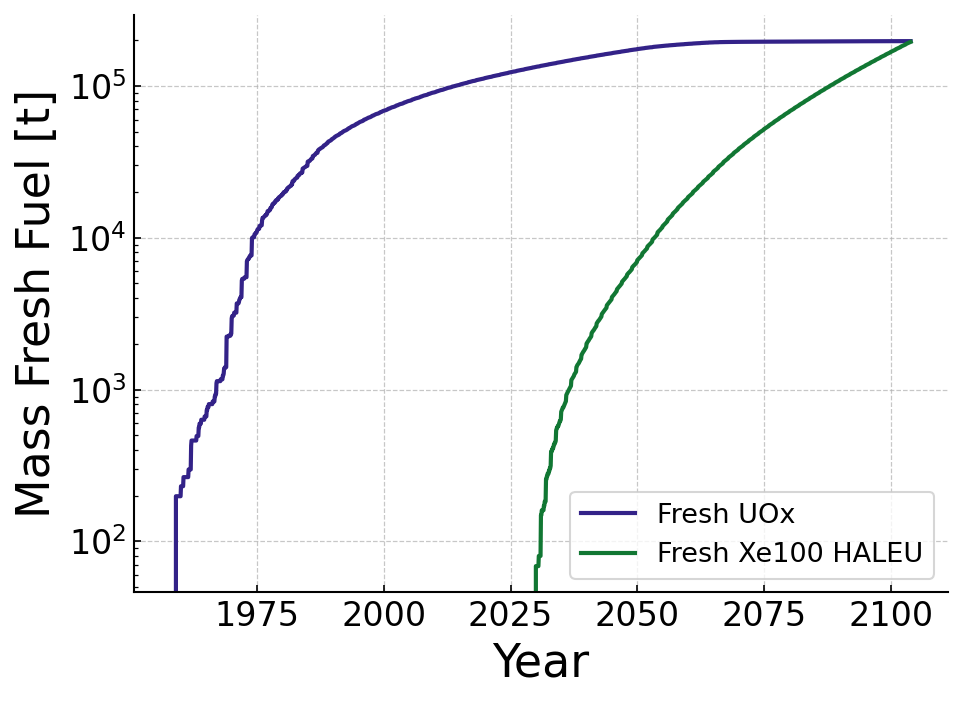

In [ ]:
# Comparing fresh_uox transactions to all reactors

plt.plot(current_uox['Year'], current_uox['Quantity'].cumsum()/1000,
         label='Fresh UOx')

# plt.plot(current_uox['Year'], current_mmr_leup['Quantity'].cumsum()/1000,
#          label='MMR LEU+')
# plt.plot(current_uox['Year'], current_mmr_haleu['Quantity'].cumsum()/1000,
#          label='MMR HALEU', linestyle='--')

# plt.plot(current_xe_leup['Year'], current_xe_leup['Quantity'].cumsum()/1000,
#          label='Xe100 LEUp')
plt.plot(current_xe_haleu['Year'], current_xe_haleu['Quantity'].cumsum()/1000,
         label='Fresh Xe100 HALEU')

# plt.ylim(10**0, 0.5*10**6)
plt.legend() #(loc=2)
plt.ylabel('Mass Fresh Fuel [t]')
plt.xlabel('Year')
#plt.title('Mass of UOx supplied')
plt.yscale('log')

plt.savefig(out_base + save + '.pdf')

### Used fuel

In [ ]:
used_uox = dta.commodity_mass_traded(current_transactions, 'used_uox')
used_xe_leup = dta.commodity_mass_traded(current_transactions, 'used_xe100_leup')
used_xe_haleu = dta.commodity_mass_traded(current_transactions, 'used_xe100_haleu')

In [ ]:
total_used = pd.DataFrame({'Year': current_reactors['Year'],'UOX': used_uox['Quantity'], 'Total UOX': used_uox['Quantity'].cumsum(), 'Xe100 HALEU': used_xe_haleu['Quantity'], 'Total Xe100 HALEU': used_xe_haleu['Quantity'].cumsum()})

In [ ]:
save = f'used/{file}_used_fuel'
total_used.to_csv(out_base + save + '.csv', index=False)

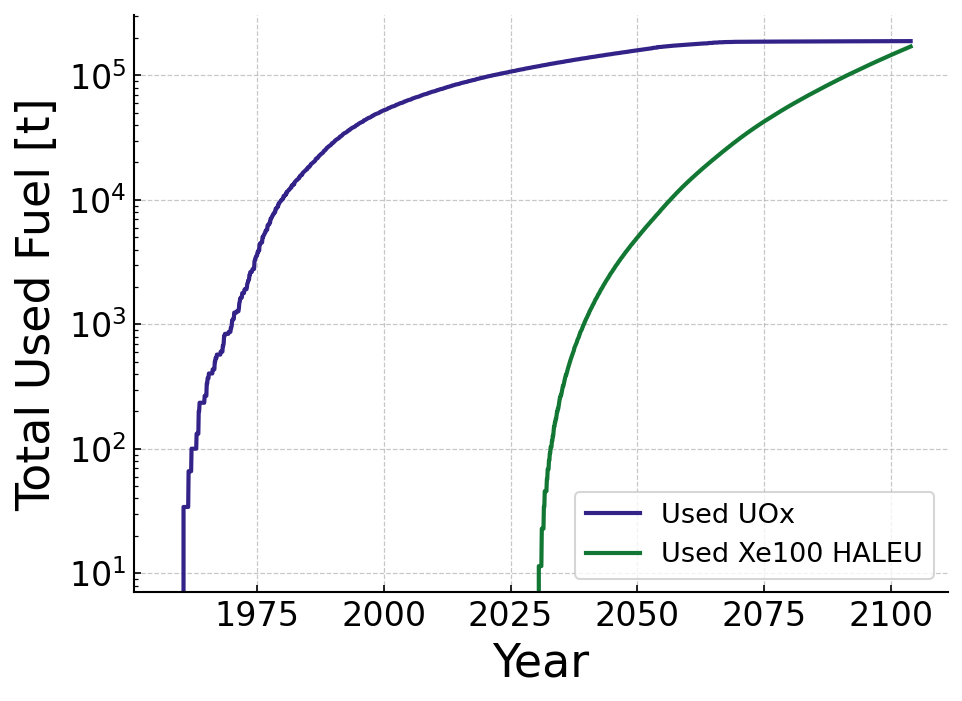

In [ ]:
plt.plot(used_uox['Year'], used_uox['Quantity'].cumsum()/1000, label='Used UOx')

# plt.plot(used_xe_leup['Year'], used_xe_leup['Quantity'].cumsum()/1000, label='Used Xe100 LEU+')
plt.plot(used_xe_haleu['Year'], used_xe_haleu['Quantity'].cumsum()/1000, label='Used Xe100 HALEU')

plt.yscale('log')
plt.ylabel('Total Used Fuel [t]')
plt.xlabel('Year')
plt.legend()

plt.savefig(out_base + save + '.pdf')

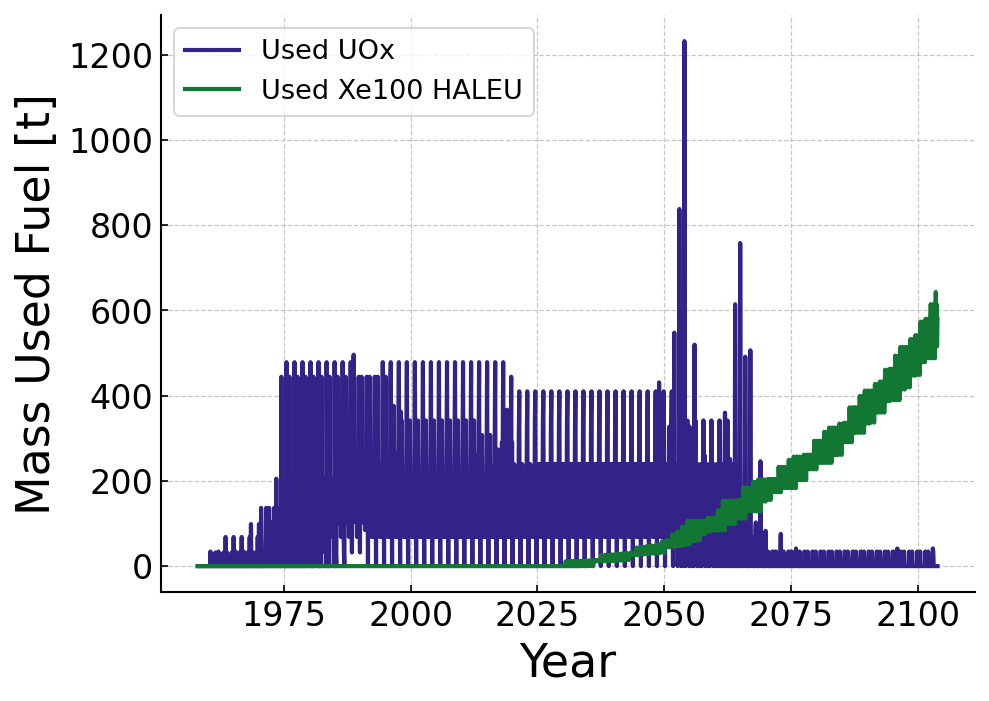

In [ ]:
plt.plot(used_uox['Year'], used_uox['Quantity']/1000, label='Used UOx')
# plt.plot(used_xe_leup['Year'], used_xe_leup['Quantity']/1000, label='Used Xe100 LEU+')
plt.plot(used_xe_haleu['Year'], used_xe_haleu['Quantity']/1000, label='Used Xe100 HALEU')

# plt.yscale('log')
plt.ylabel('Mass Used Fuel [t]')
plt.xlabel('Year')
plt.legend()

plt.savefig(out_base + save + '_yearly.pdf')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [72]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
mmrh_p = 0.13
mmrl_p = 0.0995
xeh_p = 0.155
xel_p = 0.0995
x_f = 0.00711
x_t = 0.002

In [73]:
current_tails_lwr = dta.calculate_tails(current_uox['Quantity'], leu_p, x_t, x_f)
current_feed_lwr = dta.calculate_feed(current_uox['Quantity'], current_tails_lwr)
current_swu_lwr = dta.calculate_SWU(current_uox['Quantity'], leu_p,
                               current_tails_lwr, x_t,
                               current_feed_lwr, x_f)
current_swu_lwr = current_swu_lwr.to_frame().reset_index()
current_swu_lwr = current_swu_lwr.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_lwr = dta.add_year(current_swu_lwr)

In [60]:
current_tails_mmrh = dta.calculate_tails(current_mmr_haleu['Quantity'], mmrh_p, x_t, x_f)
current_feed_mmrh = dta.calculate_feed(current_mmr_haleu['Quantity'], current_tails_mmrh)
current_swu_mmrh = dta.calculate_SWU(current_mmr_haleu['Quantity'], mmrh_p,
                               current_tails_mmrh, x_t,
                               current_feed_mmrh, x_f)
current_swu_mmrh = current_swu_mmrh.to_frame().reset_index()
current_swu_mmrh = current_swu_mmrh.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_mmrh = dta.add_year(current_swu_mmrh)

In [71]:
current_tails_mmrl = dta.calculate_tails(current_mmr_leup['Quantity'], mmrl_p, x_t, x_f)
current_feed_mmrl = dta.calculate_feed(current_mmr_leup['Quantity'], current_tails_mmrl)
current_swu_mmrl = dta.calculate_SWU(current_mmr_leup['Quantity'], mmrl_p,
                               current_tails_mmrl, x_t,
                               current_feed_mmrl, x_f)
current_swu_mmrl = current_swu_mmrl.to_frame().reset_index()
current_swu_mmrl = current_swu_mmrl.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_mmrl = dta.add_year(current_swu_mmrl)

In [74]:
current_tails_xeh = dta.calculate_tails(current_xe_haleu['Quantity'], xeh_p, x_t, x_f)
current_feed_xeh = dta.calculate_feed(current_xe_haleu['Quantity'], current_tails_xeh)
current_swu_xeh = dta.calculate_SWU(current_xe_haleu['Quantity'], xeh_p,
                               current_tails_xeh, x_t,
                               current_feed_xeh, x_f)
current_swu_xeh = current_swu_xeh.to_frame().reset_index()
current_swu_xeh = current_swu_xeh.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_xeh = dta.add_year(current_swu_xeh)

In [75]:
current_tails_xel = dta.calculate_tails(current_xe_leup['Quantity'], xel_p, x_t, x_f)
current_feed_xel = dta.calculate_feed(current_xe_leup['Quantity'], current_tails_xel)
current_swu_xel = dta.calculate_SWU(current_xe_leup['Quantity'], xel_p,
                               current_tails_xel, x_t,
                               current_feed_xel, x_f)
current_swu_xel = current_swu_xel.to_frame().reset_index()
current_swu_xel = current_swu_xel.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu_xel = dta.add_year(current_swu_xel)

NameError: name 'current_xe_leup' is not defined

In [97]:
total_swu = pd.DataFrame({'Year': current_reactors['Year'],'UOx': current_swu_lwr['SWU'], 'Total UOx SWU': current_swu_lwr['SWU'].cumsum(), 'Xe100 HALEU SWU': current_swu_xeh['SWU'], 'Total Xe100 HALEU SWU': current_swu_xeh['SWU'].cumsum()})

In [ ]:
total_swu = pd.DataFrame({'Year': current_reactors['Year'],'UOx': current_swu_lwr['SWU'], 'Total LWR': current_swu_lwr['SWU'].cumsum(), 'MMR HALEU': current_swu_mmrh['SWU'], 'Total MMR HALEU': current_swu_mmrh['SWU'].cumsum(), 'MMR LEU+': current_swu_mmrl['SWU'], 'Total MMR LEU+': current_swu_mmrl['SWU'].cumsum(), 'Xe100 HALEU': current_swu_xeh['SWU'], 'Total Xe100 HALEU': current_swu_xeh['SWU'].cumsum(), 'Xe100 LEU+': current_swu_xel['SWU'], 'Total Xe100 LEU+': current_swu_xel['SWU'].cumsum()})

In [100]:
save = f'swu/{file}_swu'
total_swu.to_csv(out_base + save + '.csv', index=False)

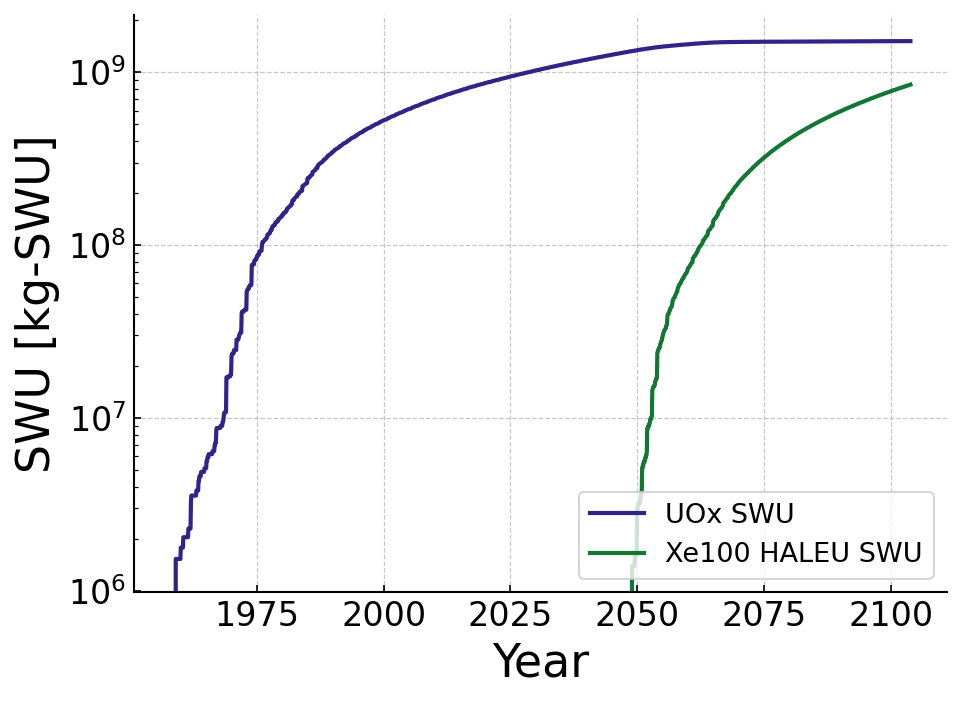

In [106]:
plt.plot(current_swu_lwr['Year'], current_swu_lwr['SWU'].cumsum(), label='UOx SWU')
plt.plot(current_swu_xeh['Year'], current_swu_xeh['SWU'].cumsum(), label='Xe100 HALEU SWU')
# plt.plot(current_swu_xel['Year'], current_swu_xel['SWU'].cumsum(), label='Xe100 LEU+ SWU')

# plt.ylim(10**6, 10**10)
plt.xlabel('Year')
plt.ylabel('SWU [kg-SWU]')
plt.yscale('log')
#title = plt.title('SWU Capacity to enrich uranium for LWRs', pad=20)
plt.legend()

plt.savefig(out_base + save + '.pdf')

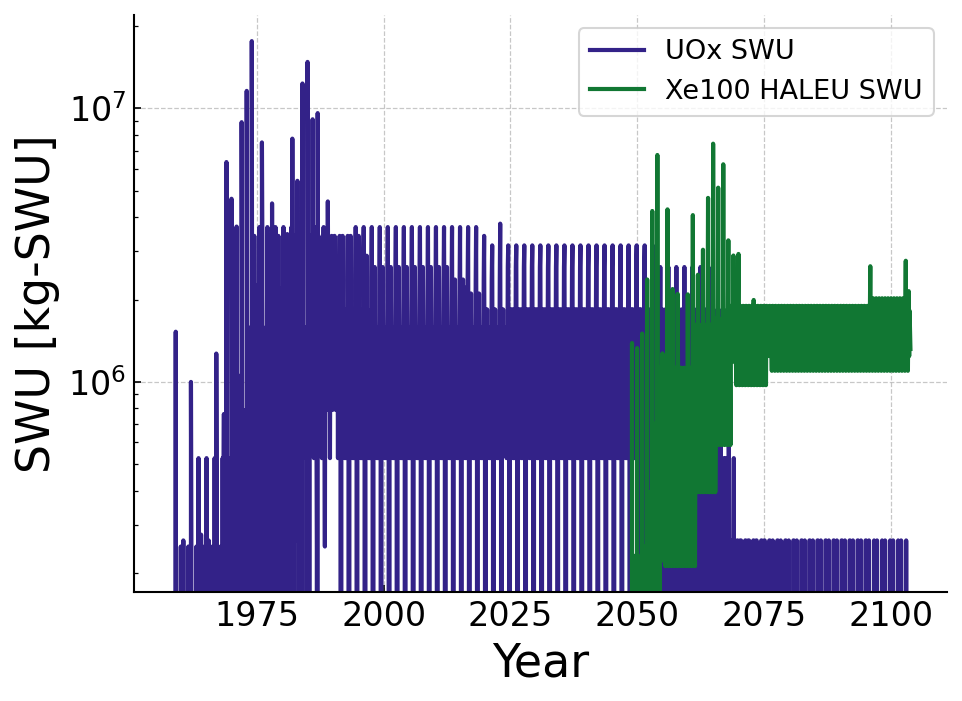

In [105]:
plt.plot(current_swu_lwr['Year'], current_swu_lwr['SWU'], label='UOx SWU')
plt.plot(current_swu_xeh['Year'], current_swu_xeh['SWU'], label='Xe100 HALEU SWU')
# plt.plot(current_swu_xel['Year'], current_swu_xel['SWU'].cumsum(), label='Xe100 LEU+ SWU')

# plt.ylim(10**6, 10**10)
plt.xlabel('Year')
plt.ylabel('SWU [kg-SWU]')
plt.yscale('log')
#title = plt.title('SWU Capacity to enrich uranium for LWRs', pad=20)
plt.legend()

plt.savefig(out_base + save + '_yearly.pdf')

# Isotopics

In [1]:
all_isotopes = ['551370000', '922350000', '922380000', '942390000']
commodities_uox = ['used_uox']
commodities_mmrl = ['used_mmr_leup']
commodities_mmrh = ['used_mmr_haleu']
receivers = ['Sink_HLW']

In [19]:
isotope_db_uox = nuclides.isotope_database(evaler=evaler,receivers=receivers, commodities=commodities_uox, isotopes=all_isotopes)

isotope_db_uox.to_csv('isotope_db_uox.csv')

: 

In [ ]:
isotope_db_mmrl = nuclides.isotope_database(evaler=evaler,receivers=receivers, commodities=commodities_mmrl, isotopes=all_isotopes)

isotope_db_mmrl.to_csv('isotope_db_mmrl.csv')

In [ ]:
isotope_db_mmrh = nuclides.isotope_database(evaler=evaler,receivers=receivers, commodities=commodities_mmrh, isotopes=all_isotopes)

isotope_db_mmrh.to_csv('isotope_db_mmrh.csv')

In [ ]:
# read in the isotope database from the csv to a pandas dataframe
isotope_db_uox = pd.read_csv('isotope_db_uox.csv')

In [6]:
isotope_db['TimeStep'] = isotope_db['Unnamed: 0']

In [7]:
isotope_db = isotope_db.drop(columns=['Unnamed: 0'])
isotope_db = isotope_db.sort_values(by='TimeStep')

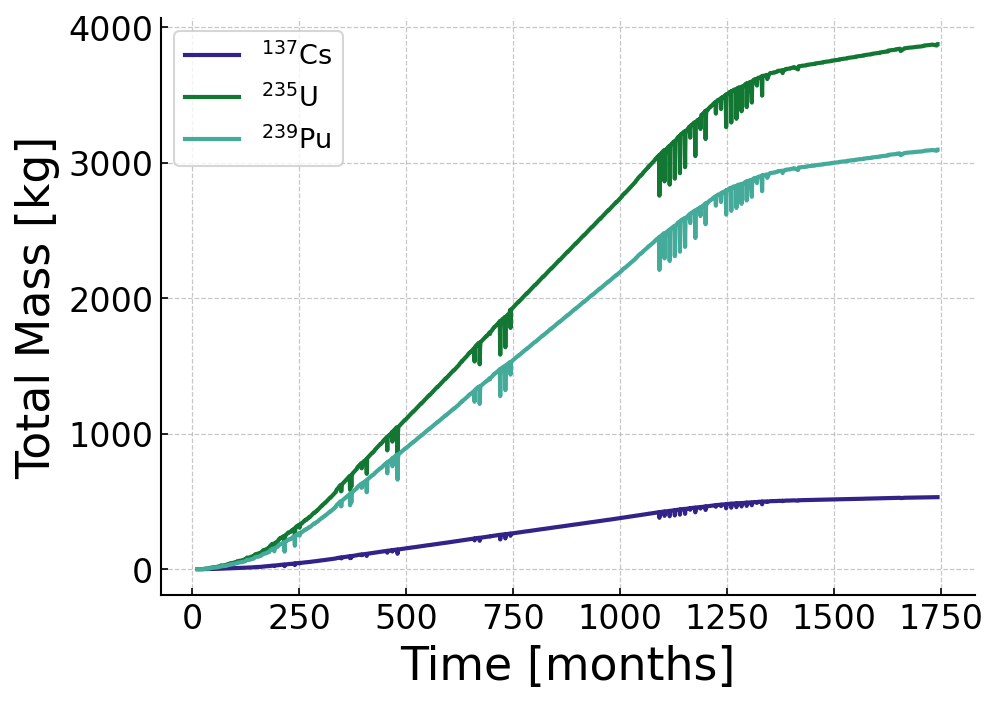

In [8]:
isotope_db[['TimeStep','551370000_total','922350000_total','942390000_total']].plot(x='TimeStep', style=['-','-','-'])
plt.xlabel('Time [months]')
plt.ylabel('Total Mass [kg]')

legend = plt.legend()
legend.get_texts()[0].set_text(f'$^{{137}}$Cs')
legend.get_texts()[1].set_text(f'$^{{235}}$U')
legend.get_texts()[2].set_text(f'$^{{239}}$Pu')